In [0]:
from fastai.collab import *
from fastai.tabular import *

In [2]:
'''from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'''

'from google.colab import drive\ndrive.mount(\'/content/gdrive\', force_remount=True)\nroot_dir = "/content/gdrive/My Drive/"\nbase_dir = root_dir + \'fastai-v3/'

뒤에서 파일 업로드를 빠르게 하기 위해 마운트 했다. 노트북을 다시 실행하는 경우 넘어가기 위해 일부러 묶었다.

## Collaborative filtering example

collaborative filtering(협업 필터링)은 사용자들로부터 얻은 기호정보에 따라 "사용자들의 관심사들을 자동적으로 예측"하게 해주는 방법이다. 내 추천 광고가 자동으로 뜨는 것도 아마 이 collaborative filtering의 예시일것 같다.

이번 목표는 내가 좋아하는 주제인 영화에 대한거라 더 흥미로웠다. 뒤에 결과를 분석하는 부분에서도 어떤 의미인지 딱 느껴지니까 재미있었다.

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title'

아래에서 반복해서 계속 쓰일 것이다.

In [4]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

우선, 지난시간의 imdb처럼 샘플 버전으로 간단한 테스트를 해보겠다. 이번에 우리가 할 것은 어떤 영화를 사용자가 좋아할지 좋아하지 않을 지 예측하는 것이다.

In [5]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


csv이므로 마찬가지로 pandas로 읽어보면 다음과 같은 내용을 읽을 수 있다. 유저 id, 영화 id(아마도 특정 영화 제목을 의미할 것), 평점, 그리고 timestamp(?)가 있다. 타임스탬프가 뭔지 찾아보니 특정한 시각을 나타내는 문자열이라고 한다. 

That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

Data Bunch를 만들고,

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

Learner를 만들고, 

In [9]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.600266,0.919592,00:01
1,0.854944,0.679621,00:01
2,0.656859,0.674088,00:01


fitting을 해준다. 이런식으로 어떤 id의 유저가 어떤 영화를 좋아할지 아닐지 예측할 수 있다.

## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [10]:
path=Config.data_path()/'ml-100k'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/ml-100k')

In [11]:
'''!mv '/content/gdrive/My Drive/fastai-v3/u.data' '/root/.fastai/data/ml-100k'
!mv '/content/gdrive/My Drive/fastai-v3/u.item' '/root/.fastai/data/ml-100k'''

"!mv '/content/gdrive/My Drive/fastai-v3/u.data' '/root/.fastai/data/ml-100k'\n!mv '/content/gdrive/My Drive/fastai-v3/u.item' '/root/.fastai/data/ml-100k"

빠르게 업로드하기 위해 파일을 구글 드라이브에 넣은 후 path로 옮겼다.

In [12]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


u.data를 읽으니 유저가 특정영화에 대해 어떤 평가를 내렸는지를 모아놓은 데이터임을 알 수 있다.

이제 ratings는 평가가 저장된 변수다.

In [13]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


u.item에는 각 movie id에 대한 자세한 정보가 담겨있다.

이제 movies는 각 movieid와 영화정보가 담긴 변수다.

In [14]:
len(ratings)

100000

In [15]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


movieId와 title을 합치며 매칭시켜주었고, 이것은 rating_movie 변수에 저정되었다. .head()로 앞부분을 보여주었다. 

In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [17]:
data.show_batch()

userId,title,target
94,Fargo (1996),5.0
724,"Man Who Knew Too Little, The (1997)",3.0
896,Bad Company (1995),2.0
576,One Fine Day (1996),3.0
450,"Portrait of a Lady, The (1996)",3.0


DataBunch를 만들었다. 이제 data가 다음과 같이 이루어져있음을 show_batch로 간단히 살펴보았다.

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


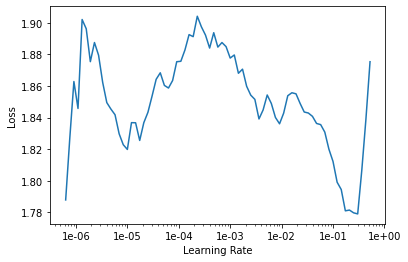

In [20]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [21]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.934176,0.953658,00:14
1,0.863561,0.875714,00:13
2,0.763170,0.830448,00:14
3,0.656785,0.816025,00:13
4,0.580880,0.814558,00:13


fitting을 해주었다.

In [0]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [0]:
learn.load('dotprod');

In [24]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [25]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

rating을 기준으로 정렬하여 가장 평가가 많이 된 상위 10개 영화를 보여주었다. 역시 인기 있는 영화들로, 스타워즈 영화가 순위권에 두개나 있다.

### Movie bias

In [26]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

평균 평점으로도 묶을 수 있는데, movie_ratings에 저장했다.

In [0]:
item0 = lambda o:o[0]

In [29]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3719),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3116),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2808), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2633), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2475), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2436), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2421), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2298), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2216), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2195), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2080), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2076), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2067), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.1960), 'Grease 2 (1982)', 2.0),
 (tensor(-0.1921), '

오름차순으로 sort한 결과, 이것들은 평점이 낮은 영화들이다.
Children of the Corn이 무슨 영화인가 찾아봤다. IMDb 기준 5.7에 로튼토마토 신선도 35퍼센트인 것을 보아 별로 좋지 않은 영화인 것 같으니 잘 실행된 것 같다.



In [30]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6147), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5454), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5415), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5384), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5178), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5093), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5073), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5015), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4901), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4732), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4700), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4694), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4680), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4628), 'To Kill a Mockingbird (1962)', 4.292237442922374),
 (tensor(0.4521), 'Close Shave, A (1995)', 4.491071428571429)]

이번에는 반대로 내림차순으로 sort한 평점이 높은 영화들이다. 쉰들러 리스트, 쇼생크 탈출 등 호평받은 유명한 영화들이 뜨는 것을 보니 잘 실행된 것 같다.

### Movie weights

In [31]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [32]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

fac0,1,2가 무엇인지 우리는 정확히 설명하거나 알 수 없지만, 이것은 취향과 영화 성격같은 것의 느낌으로 이해하면 된다. 아무튼 먼저 fac0의 관점에서 높은 평을 받은 영화들은 아래와 같다.

In [34]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1090), 'Wrong Trousers, The (1993)'),
 (tensor(1.0416), 'Casablanca (1942)'),
 (tensor(1.0371), 'Chinatown (1974)'),
 (tensor(1.0104), 'Close Shave, A (1995)'),
 (tensor(1.0074), 'Lawrence of Arabia (1962)'),
 (tensor(0.9942), 'When We Were Kings (1996)'),
 (tensor(0.9873),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9485), 'Citizen Kane (1941)'),
 (tensor(0.9417), 'Godfather, The (1972)'),
 (tensor(0.9197), 'Fargo (1996)')]

이 취향, 특징(?이라고 해야할까)에서 선택된 영화는 약간 고전 명작이나 평론가들이 극찬하는 느낌의 영화같다. 카사블랑카, 차이나타운, 시민 케인, 대부 등 모두 손꼽히는 명작들이 주로 보인다.

In [35]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2962), "McHale's Navy (1997)"),
 (tensor(-1.2166), 'Jungle2Jungle (1997)'),
 (tensor(-1.2122), 'Leave It to Beaver (1997)'),
 (tensor(-1.1947), 'Free Willy 3: The Rescue (1997)'),
 (tensor(-1.1563), 'Home Alone 3 (1997)'),
 (tensor(-1.1268), 'Wishmaster (1997)'),
 (tensor(-1.0955), 'Bio-Dome (1996)'),
 (tensor(-1.0863), 'Congo (1995)'),
 (tensor(-1.0799), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.0277), 'Children of the Corn: The Gathering (1996)')]

그리고 이런 요소들의 관점에서 가장 낮은 선호도를 보인 영화들이다. 사실 처음 듣는 영화들이 대부분이지만, 나홀로 집에3나 위에서도 봤던 children of the corn이 또 등장한 것을 보아 윗 셀의 영화들과 반대로 작품성이 좋지 않다고 평가된 영화들이 나오는 것을 알 수 있다. 

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [37]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1507), 'Braveheart (1995)'),
 (tensor(1.0734), 'Titanic (1997)'),
 (tensor(1.0577), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9740), "It's a Wonderful Life (1946)"),
 (tensor(0.8797), 'Independence Day (ID4) (1996)'),
 (tensor(0.8619), "Mr. Holland's Opus (1995)"),
 (tensor(0.8529), 'Forrest Gump (1994)'),
 (tensor(0.8502), 'American President, The (1995)'),
 (tensor(0.8492), 'Sleepless in Seattle (1993)'),
 (tensor(0.8444), 'Pretty Woman (1990)')]

이번에는 fac1의 관점에서 높은 평을 받은 영화들이다. 브레이브 하트, 타이타닉, 포레스트 검프 등의 영화가 있는 것으로 보아 아무래도 대중적이고 모두 즐겁게 볼 수 있는 영화 취향일 것이다.

In [38]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.9031), 'Keys to Tulsa (1997)'),
 (tensor(-0.8937), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7959), 'Brazil (1985)'),
 (tensor(-0.7877), 'Jude (1996)'),
 (tensor(-0.7828), 'Beavis and Butt-head Do America (1996)'),
 (tensor(-0.7794), 'Trainspotting (1996)'),
 (tensor(-0.7781), 'Dead Man (1995)'),
 (tensor(-0.7680), 'Lost Highway (1997)'),
 (tensor(-0.7536), 'Clockwork Orange, A (1971)'),
 (tensor(-0.7517), 'Cable Guy, The (1996)')]

그리고 이 취향과 가장 먼 영화들이다. 시계태엽 오렌지가 있는 것을 보아 예상대로 호불호가 많이 갈리는 영화들의 목록인 것 같다. 실제로 영화 제목들을 검색해보니 거의 청불에 고어, 강력범죄 관련 영화이다.

In [0]:
movie_comp = [(f, i) for f,i in zip(fac2, top_movies)]

In [41]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0260), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.9299), 'Terminator, The (1984)'),
 (tensor(0.8608), 'Reservoir Dogs (1992)'),
 (tensor(0.8212), 'Scream (1996)'),
 (tensor(0.7719), 'Clerks (1994)'),
 (tensor(0.7703), 'Starship Troopers (1997)'),
 (tensor(0.7568), 'Alien: Resurrection (1997)'),
 (tensor(0.7536), 'Seven (Se7en) (1995)'),
 (tensor(0.7182), 'Trainspotting (1996)'),
 (tensor(0.7114), 'Crow, The (1994)')]

이건 원본 ipynb에는 없었지만 그냥 궁금해서 해봤다. fac2의 취향은 아무래도 터미네이터, 스크림, 에이리언, 세븐 같은 것을 보아 액션, 스릴러, 범죄 요런 종류의 영화들이다. 한마디로 정의는 안되지만 일단 어떤 느낌의 영화들인지는 대충 감이 온다.

In [42]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.6626), 'Lone Star (1996)'),
 (tensor(-0.6329), 'My Fair Lady (1964)'),
 (tensor(-0.6158), 'Sound of Music, The (1965)'),
 (tensor(-0.6120), 'Jane Eyre (1996)'),
 (tensor(-0.6068), 'Steel (1997)'),
 (tensor(-0.5968), 'Getaway, The (1994)'),
 (tensor(-0.5947), 'Old Yeller (1957)'),
 (tensor(-0.5802), 'Bridges of Madison County, The (1995)'),
 (tensor(-0.5718), 'Specialist, The (1994)'),
 (tensor(-0.5666), 'Home for the Holidays (1995)')]

그리고 이 취향이 좋아하지 않는 영화들이다. 마이 페어 레이디, 사운드 오브 뮤직, 제인에어 등 평화로움이 느껴지는 영화들이 많다.

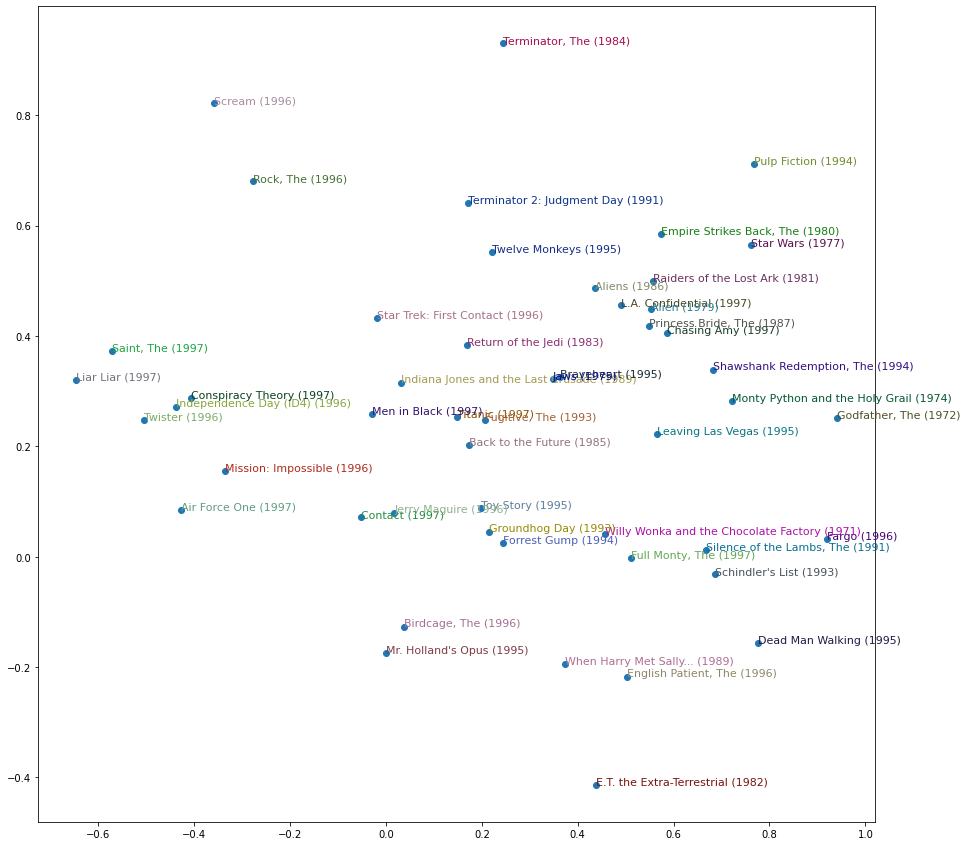

In [46]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

이건 가장 많이 평가된 상위 50 영화들을 그래프로 좀더 재밌게 나타내본 것이다. x축은 fac0 성격에서의, y축은 fac2 성격에서의 평가를 나타낸다. 가까운 성격의 영화들일 수록 서로 비슷한 평가를 받았을 터인데, 실제 위 그래프도 어느정도 그래보인다. 물론 영화 취향이란 복잡한 것이니 절대적으로 딱 그룹이 나눠지진 않고, 의외인 것도 있다(양들의 침묵과 71년작 찰리와 초콜릿 공장이 딱 붙어있다든지). 하지만 스크림과 E.T.는 거의 정반대에 있고, 스타트렉과 스타워즈:제다이의 귀환은 서로 붙어있고, 사랑의 블랙홀이랑 포레스트 검프(이 영화들은 주연배우도 비슷하게 생겼다)도 딱 붙어있으며, 전체적으로 봤을 때도 거의 비슷한 스타일끼리 분포 되어 있다고 할 수 있겠다. 시험삼아 100개로 늘려서 실행해보니 단테스 피크랑 볼케이노가 서로 붙어있고 스타워즈4랑 5도 서로 붙어있고 그랬다. 